국가별 음주분석

In [1]:
import pandas as pd
drink = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/12%EC%A3%BC%EC%B0%A8/data/drink.csv')
drink.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [2]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [3]:
drink.describe(include='all')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193,193.000000,193.000000,193.000000,193.000000,170
unique,193,NaN,NaN,NaN,NaN,5
top,Afghanistan,NaN,NaN,NaN,NaN,AF
freq,1,NaN,NaN,NaN,NaN,53
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
std,NaN,101.143103,88.284312,79.697598,3.773298,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,NaN,76.000000,56.000000,8.000000,4.200000,NaN
75%,NaN,188.000000,128.000000,59.000000,7.200000,NaN


인사이트 탐색
- 피처간의 상관관계(beer_servings, wine_servings)

In [4]:
drink[['beer_servings','wine_servings']].corr()

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [5]:
# total_litres_of_pure_alcohol : 국가 또는 지역에서 소비되는 술의 총 순수 알코올 양, 해당 지역의 술 소비를 측정하는데 사용
corr = drink[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']].corr()
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [6]:
import seaborn as sns

<Axes: >

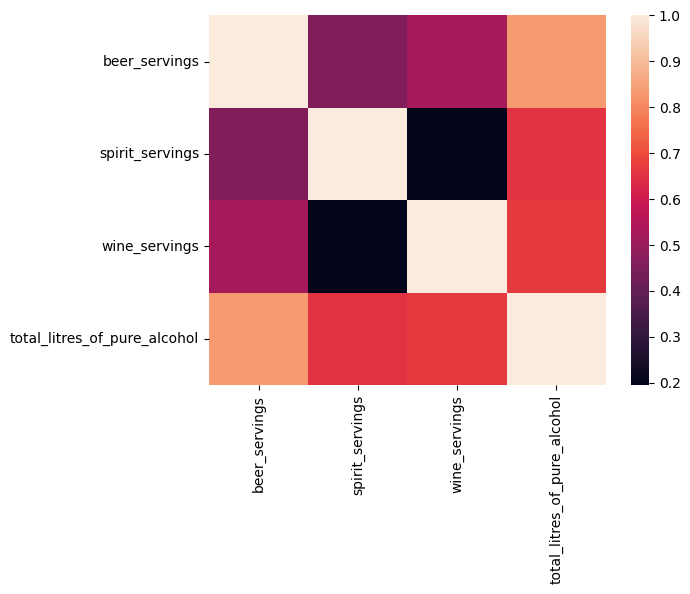

In [7]:
sns.heatmap(corr)

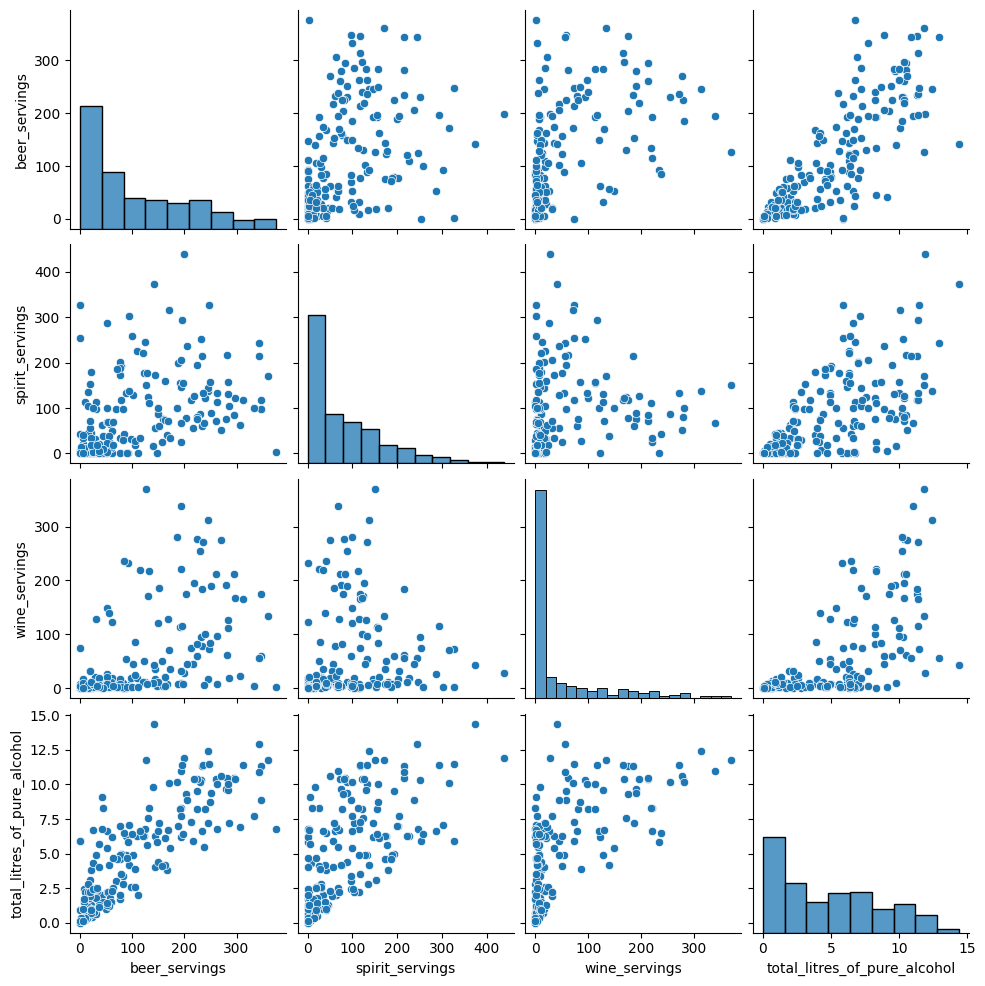

In [8]:
import matplotlib.pyplot as plt
sns.pairplot(drink[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']])
plt.show()

탐색적 분석

In [9]:
# 결측치 처리
drink.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [10]:
drink['continent'].value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [11]:
drink[drink.isnull().any(axis=1)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [12]:
drink['continent'] = drink['continent'].fillna('ETC')

continent별 비율
- pychart

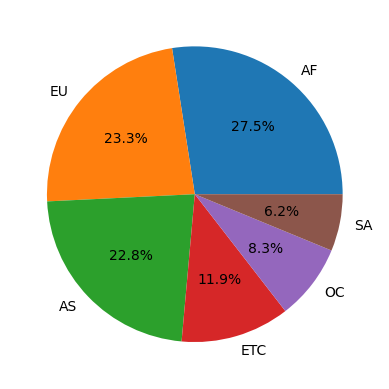

In [13]:
labels = drink['continent'].value_counts().index.tolist()
dataset = drink['continent'].value_counts().values.tolist()
plt.pie(dataset, labels=labels, autopct='%.1f%%')
plt.show()

그룹단위: 대륙별 분석

In [14]:
result = drink.groupby('continent')['beer_servings'].agg(['mean', 'min', 'max',sum])
result

,mean,min,max,sum
continent,,,,
AF,61.471698,0,376,3258
AS,37.045455,0,247,1630
ETC,145.434783,1,285,3345
EU,193.777778,0,361,8720
OC,89.687500,0,306,1435
SA,175.083333,93,333,2101


전체 평균보다 많은 알코올을 소비하는 대륙

In [15]:
total_mean = drink['total_litres_of_pure_alcohol'].mean()
continent_mean = drink.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_mean[continent_mean>=total_mean]

continent
ETC    5.995652
EU     8.617778
SA     6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [16]:
# 평균 bear_serving이 가장 높은 대륙
beer_continent = drink.groupby('continent')['beer_servings'].mean()
beer_continent.max()

193.77777777777777

대륙별 beer_serving에 평균 최소 최대 합계를 시각화

In [17]:
n_groups = len(result)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

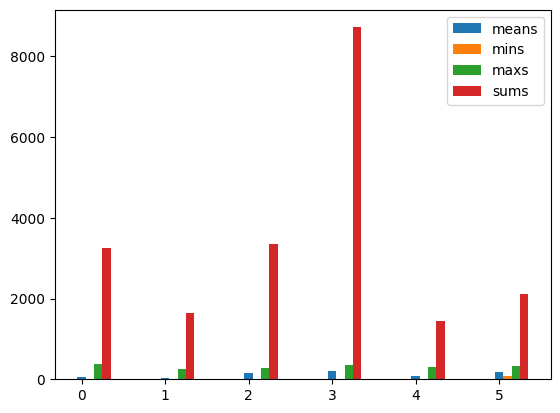

In [18]:
import numpy as np
x_pos = np.arange(n_groups)
bar_width = 0.1
plt.bar(x_pos, means, bar_width, label='means')
plt.bar(x_pos+bar_width, mins, bar_width, label='mins')
plt.bar(x_pos+bar_width*2, maxs, bar_width, label='maxs')
plt.bar(x_pos+bar_width*3, sums, bar_width, label='sums')
plt.legend()
plt.show()

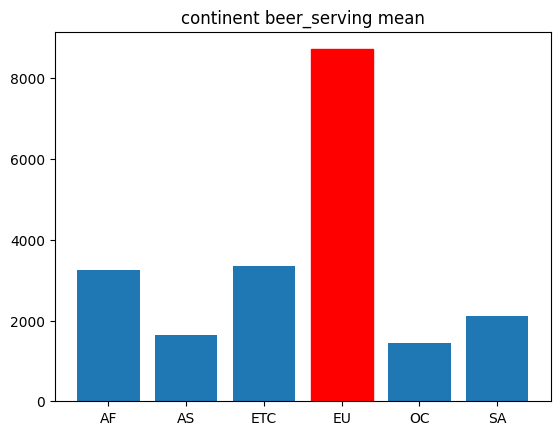

In [19]:
# 대륙별 beer_serving 시각화
beer_group = drink.groupby('continent')['beer_servings'].sum()
continent = beer_group.index.tolist()
y_pos = np.arange(len(continent))
beer_group, continent
alcohol = beer_group.values.tolist()

bar_list = plt.bar(x_pos, alcohol, align='center')
bar_list[continent.index('EU')].set_color('r')
plt.xticks(x_pos, continent)
plt.title('continent beer_serving mean')
plt.show()

<ipython-input-20-85ac28b04fed>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot([0,6],[total_mean, total_mean],'go--', c='black')


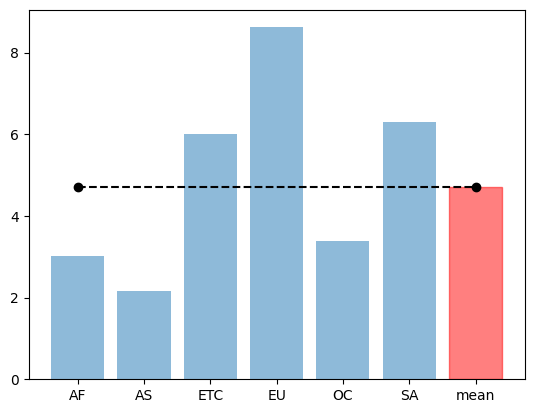

In [20]:
# 대륙별 total_liters 시각화
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[6].set_color('r')
plt.plot([0,6],[total_mean, total_mean],'go--', c='black')
plt.xticks(x_pos, continents)
plt.show()

분석 대상간의 통계적 차이 검증하기

In [22]:
# 아프리카와 유럽간의 맥주 소비량 차이 검증
!pip install scipy

In [24]:
africa = drink.loc[drink['continent'] == 'AF']
europe = drink.loc[drink['continent'] == 'EU']

In [25]:
from scipy import stats

In [26]:
ttest_result = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
ttest_resultdiffvar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=True)

In [27]:
ttest_result

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)

In [28]:
ttest_resultdiffvar

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)

In [30]:
print(drink['country'].value_counts().index)

Index(['Afghanistan', 'Libya', 'Niger', 'Nigeria', 'Niue', 'Norway', 'Oman',
       'Pakistan', 'Palau', 'Panama',
       ...
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Zimbabwe'],
      dtype='object', length=193)


In [31]:
drink[drink['country'] == 'South Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
138,South Korea,140,16,9,9.8,AS


In [32]:
drink['total_serving'] = drink['beer_servings'] + drink['spirit_servings'] + drink['wine_servings']

In [33]:
drink['alcohol_rate'] = drink['total_litres_of_pure_alcohol'] / drink['total_serving']
drink.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                        0
total_serving                    0
alcohol_rate                    13
dtype: int64

In [34]:
drink['alcohol_rate'] = drink['alcohol_rate'].fillna(0)

In [36]:
country_with_rank = drink[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=False)
country_with_rank

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
...,...,...
103,Maldives,0.000000
97,Libya,0.000000
79,Iran,0.000000
90,Kuwait,0.000000


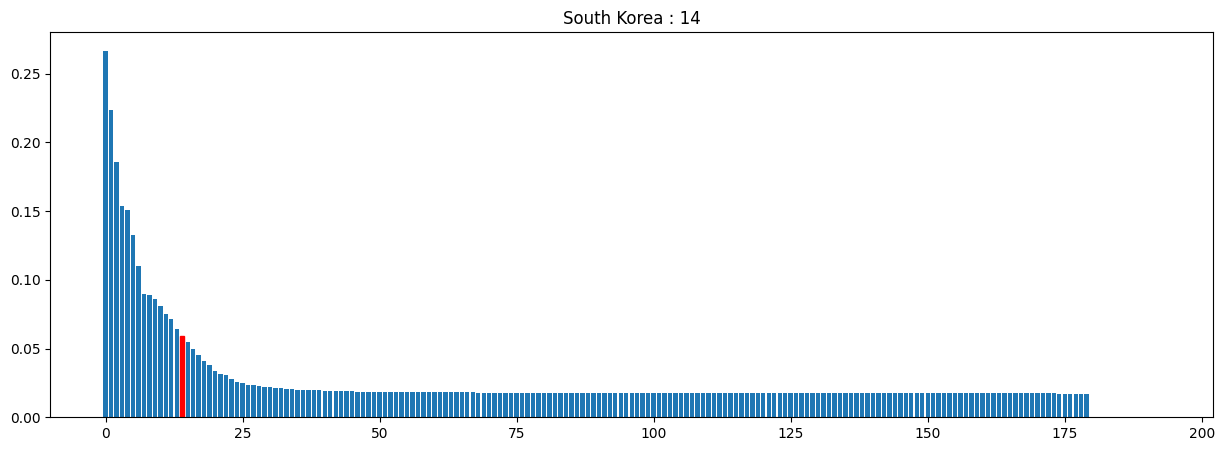

In [42]:
country_list = country_with_rank['country'].tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank['alcohol_rate'].tolist()

plt.figure(figsize=(15,5))
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index('South Korea')].set_color('r')

plt.title(f"South Korea : {country_list.index('South Korea')}")
plt.show()